### The complete process step by step
1. Scrapping data & type of fraud
2. Language Translation
3. Extraction of Data
    3.1 E-mail Id
    3.2 Phone nos
    3.3 Entities
    3.4 Hashtags
    3.5 Mentions
4. Data Cleaning
    4.1 Extracted items
    4.2 URLs
    4.3 Mentions
    4.4 Hashtags
    4.5 Special character & punctuations
    4.6 Accented characters
    4.7 Non UTF-8 Encoded
    4.8 Stopwords
    4.9 Case conversion
5. Tokenization
6. Lemmatization
7. N-grams/ Bag of words (not required for all processes)
8. Sentiment Analysis
9. Emotion Classification
10. Intent Analysis

In [7]:
# Importing all the relevant packages
import pandas as pd
import numpy as np
import os
import csv
from googletrans import Translator
import re
import nltk
from bs4 import BeautifulSoup
import unidecode
from nltk.stem import WordNetLemmatizer
import spacy
from spacy import displacy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.corpus import sentiwordnet as swn
import text2emotion as te
from collections import Counter
from PIL import Image
from wordcloud import WordCloud


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yugan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yugan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yugan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yugan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yugan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Language Translation

In [10]:
translator = Translator()

In [11]:
df_tweets_raw = pd.read_csv ('Scrapped_tweets.csv')
#df_tweets_raw.head(2)

In [12]:
i=0
l=len(df_tweets_raw.Text)
translated_tweets = []
while i<l:
    try:
        temp= translator.translate(df_tweets_raw.Text[i], dest='en')
        translated_tweets.append(temp.text)
    except:
        translated_tweets.append(df_tweets_raw.Text[i])
    # to check if it is iterating or not
    #print(i)  
    i=i+1

In [13]:
df_tweets_raw['Translated']=translated_tweets

In [14]:
df_tweets_raw.drop('Unnamed: 0', axis='columns', inplace=True)
df_tweets_raw.drop('Tweet Id', axis='columns', inplace=True)
df_tweets_raw.drop('Source', axis='columns', inplace=True)

In [15]:
# Export dataframe into a CSV
df_tweets_raw.to_csv('translated_tweets.csv', sep=',', index=False)

### Extraction

In [16]:
df_tweets_translated = df_tweets_raw

In [17]:
# lower case function
def lowertext(text):
    x=text.lower()
    return x

In [18]:
# Function to convert list to string
def listToString(s):  
    str1 = "" 
    for ele in s: 
        str1 += ele + " "  
    return str1 

In [19]:
## email id extraction
def email_ext(text):
    email = re.findall('\S+@\S+', text)
    return email

In [20]:
## email id removal
def email_rem(text):
    email = re.sub('\S+@\S+','', text)
    return email

In [21]:
## phone no extraction
def phoneno_ext(text):
    phoneno= re.findall('((?:\+\d{2}[-\.\s]??|\d{4}[-\.\s]??)?(?:\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\(\d{3}\)\s*\d{3}[-\.\s]??\d{4}|\d{3}[-\.\s]??\d{4}))', text)
    return phoneno

In [22]:
## phone no removal
def phoneno_rem(text):
    phoneno= re.sub('((?:\+\d{2}[-\.\s]??|\d{4}[-\.\s]??)?(?:\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\(\d{3}\)\s*\d{3}[-\.\s]??\d{4}|\d{3}[-\.\s]??\d{4}))','' ,text)
    return phoneno

In [23]:
# removal of https, urls and other links
def urlbuster(thestring):
    URLless_string = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', thestring)
    return(URLless_string)

In [24]:
#extraction of hashtags
def extract_hashtags(text):
    hashtag_list = []
    for word in text.split():
        if word[0] == '#':
            hashtag_list.append(word[1:])
    return(hashtag_list)

In [25]:
#removal of hashtags
def remove_hashtags(text):
    hashtag_list = []
    for word in text.split():
        if word[0] != '#':
            hashtag_list.append(word[0:])
    return(listToString(hashtag_list))

In [26]:
#extraction of @ mentions
def extract_mention(text):
    mention_list = []
    for word in text.split():
        if word[0] == '@':
            mention_list.append(word[1:])
    return(mention_list)

In [27]:
#removal of @ mentions
def remove_mention(text):
    mention_list = []
    for word in text.split():
        if word[0] != '@':
            mention_list.append(word[0:])
    return(listToString(mention_list))

In [28]:
# normalization of accented characters 
def accento_correcto(text):
    output_string = unidecode.unidecode(text)
    return(output_string)

In [29]:
# remove special characters, punctuations
def not_so_special_anymore(text):
    x=re.sub('[^A-Za-z0-9 ]+', ' ', text)
    return(x)

In [30]:
# function to remove recurring spaces
def singularity(text):
    x=re.sub(' +', ' ', text)
    return(x)

In [31]:
#df_tweets_translated.head(2)

In [32]:
# Calling functions for extraction of email id, phone no, hashtags, mentions and removal of everything except stopwords
# Entity dealt seperately
i=0
l=len(df_tweets_translated.Translated)
cleaned_data = []
email_list=[]
phonebook=[]
hashtag_list =[]
mention_list=[]
while i<l:
    try:
        email_list.append(email_ext(df_tweets_translated.Translated[i]))
    except:
        email_list.append("")
    try:
        phonebook.append(phoneno_ext(df_tweets_translated.Translated[i]))
    except:
        phonebook.append("")
    try:
        mention_list.append(extract_mention(df_tweets_translated.Translated[i]))
    except:
        mention_list.append("")
    try:    
        hashtag_list.append(extract_hashtags(df_tweets_translated.Translated[i]))
    except:
        hashtag_list.append("")
     
    temp=(accento_correcto(df_tweets_translated.Translated[i]))
    temp=(remove_mention(temp))
    temp=(remove_hashtags(temp))
    temp=(phoneno_rem(temp))
    temp=(email_rem(temp))
    temp=(urlbuster(temp))
    temp=(singularity(temp))
    temp=(not_so_special_anymore(temp))
    cleaned_data.append(temp)          
    # to check if it is iterating or not
    i=i+1

### Entity Detection

In [33]:
NER = spacy.load("en_core_web_sm")

D:\Anaconda\lib\site-packages\spacy\util.py:833: UserWarning: [W095] Model 'en_core_web_sm' (3.1.0) was trained with spaCy v3.1 and may not be 100% compatible with the current version (3.2.3). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [34]:
def inspector_entity_detector(string):
    text1=NER(string)
    temp=[]
    for word in text1.ents:
        if word.label_ == "GPE" or word.label_== "PERSON" or word.label_== "ORG":
            temp.append(word.text)
    return temp

In [35]:
i=0
l=len(cleaned_data)
entity_set = []
while i<l:
    temp=[]
    try:
        temp= inspector_entity_detector(cleaned_data[i])
    except:
        temp=None
    entity_set.append(temp)
    #print(i)
    i=i+1

In [36]:
df_tweets_translated['Entities']=entity_set

In [37]:
#df_tweets_translated.head(2)

In [38]:
# converting entity superset list of list to list for removal from tweets
entity_superlist=[]
l=len(entity_set)
i=0
while i<l:
    k=len(entity_set[i])
    j=0
    while j<k:
        temp=entity_set[i][j].lower()
        entity_superlist.append(temp)
        j+=1
    i+=1

In [39]:
# converting entity superset list of list to list for word cloud later
entity_superlist_cloud=[]
l=len(entity_set)
i=0
while i<l:
    k=len(entity_set[i])
    j=0
    while j<k:
        temp=entity_set[i][j].lower()
        temp=re.sub(' +', ' ', temp)
        temp=(temp.strip())
        entity_superlist_cloud.append(temp)
        j+=1
    i+=1

In [40]:
# convert list of entitites to dictionary with frequency without repetition
freq = {} 
for item in entity_superlist_cloud: 
    if (item in freq): \
        freq[item] += 1
    else: 
        freq[item] = 1

In [41]:
# create function where we read old entity dictionary and merge them if they exist else create new list

In [42]:
# function removal of entities from tweets
def entity_buster(text):
    text_ls= text.split() 
    final_list = [x for x in text_ls if x not in entity_superlist]
    final_string= ' '.join(final_list)
    return final_string

In [43]:
# removal of entities and case conversion
i=0
l=len(cleaned_data)
final_data = []
while i<l:
    
    try:
        temp= entity_buster(cleaned_data[i])
        final_data.append(lowertext(temp))
    except:
        final_data.append(lowertext(cleaned_data[i]))
    i=i+1

In [44]:
#df_tweets_translated.head(2)

In [45]:
df_tweets_translated['Email']=email_list
df_tweets_translated['Phone_no']=phonebook
df_tweets_translated['Hashtag']=hashtag_list
df_tweets_translated['Mentions']=mention_list
df_tweets_translated['data_w_stopwords']=final_data

In [46]:
del df_tweets_translated['Language']
del df_tweets_translated['Translated']

Splitting the data into 2 based on stop word removal

In [47]:
# stopword removal
sw_spacy = NER.Defaults.stop_words
def stopword_remover(text):
    words = [word for word in text.split() if word.lower() not in sw_spacy]
    new_text = " ".join(words)
    return new_text

In [48]:
# spacy word tokenizer
def token_of_appreciation(texts):
    doc=NER(texts)
    tokens = []
    for token in doc:
        tokens.append(token.text)
    return(tokens)

In [49]:
# spacy lemmatization
lemmatizer = WordNetLemmatizer()
def lemon_lemmatizer(texts):
    # Tokenize: Split the sentence into words
    word_list = nltk.word_tokenize(texts)
    # Lemmatize list of words and join
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    return(lemmatized_output)

In [50]:
#df_tweets_translated.head(2)

In [51]:
# removal of stopwords
i=0
l=len(df_tweets_translated.data_w_stopwords)
wo_stopwords = []
while i<l:
    try:
        wo_stopwords.append(stopword_remover(df_tweets_translated.data_w_stopwords[i]))
    except:
        wo_stopwords.append(df_tweets_translated.data_w_stopwords[i])
    i=i+1

In [52]:
df_tweets_translated['data_wo_stopwords']=wo_stopwords

In [53]:
#df_tweets_translated.head(2)

### Sentiment Analysis and Emotion Classification

In [54]:
# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

df_tweets_translated['POS tagged'] = df_tweets_translated['data_w_stopwords'].apply(token_stop_pos)
#df_tweets_translated.head()

In [55]:
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df_tweets_translated['Lemma'] = df_tweets_translated['POS tagged'].apply(lemmatize)
#df_tweets_translated.head()

In [56]:
fin_data = pd.DataFrame(df_tweets_translated[['Text', 'Lemma']])

In [57]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
# function to calculate vader sentiment
def darthvadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

fin_data['Vader Sentiment'] = fin_data['Lemma'].apply(darthvadersentimentanalysis)
# function to analyse
def darthvader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'
fin_data['Vader Analysis'] = fin_data['Vader Sentiment'].apply(darthvader_analysis)
#fin_data.head()

In [58]:
vader_counts = fin_data['Vader Analysis'].value_counts()
#vader_counts

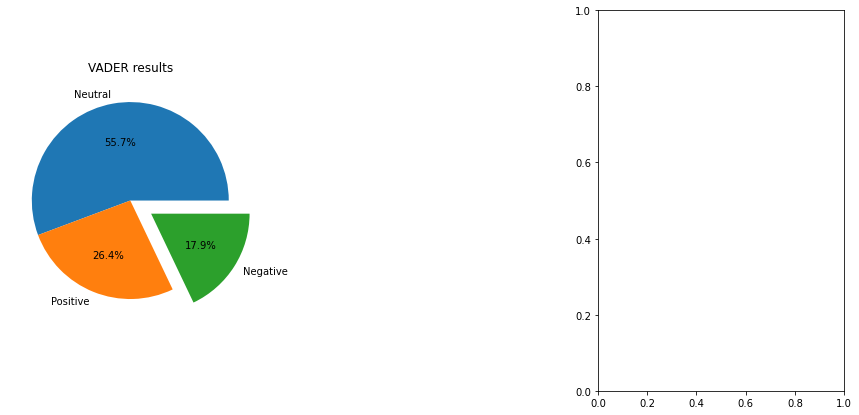

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title("VADER results")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,3)

In [63]:
# Emotional analysis
# removal of stopwords
i=0
l=len(df_tweets_translated.data_w_stopwords)
emotions = []
while i<l:
    q=te.get_emotion(df_tweets_translated.data_w_stopwords[i])
    k = Counter(q)
    high = k.most_common(2)
    emotions.append(high)
    i=i+1

In [64]:
fin_data['Emotions']=emotions

In [65]:
# Export dataframe into a CSV
fin_data.to_csv('sentiment.csv', sep=',', index=False)

In [66]:
df_tweets_translated['Sentiment']=fin_data['Vader Analysis']

In [67]:
df_tweets_translated['Emotion']=emotions

In [68]:
del df_tweets_translated['Lemma']
del df_tweets_translated['POS tagged']

In [69]:
#df_tweets_translated.head(2)

### Things to be included in Interactive Dashboard
1. EDA (Exploratory data analysis)
    1.1 Total no of tweets analysed in the run
    1.2 Geographic distribution
2. Type of fraud/ payment system in question
3. Overall sentiment (Vader graph)
4. Entity word cloud (after removing geographical locations)
5. Emotion superset pie chart
6. Button see historical entity data and see changes
7. Button to see the complete final analysed data csv

In [145]:
#EDA
#totwal no of tweets
total_tweet_count= len(df_tweets_translated.Text)

# geographical distribution
tweets_geo=df_tweets_translated.Location
cleanedList = [x for x in tweets_geo if str(x) != 'nan']

# convert list of location to dictionary with frequency without repetition
freq_geo = {} 
for item in cleanedList: 
    if (item in freq_geo): \
        freq_geo[item] += 1
    else: 
        freq_geo[item] = 1

counter_geo = Counter(freq_geo)
high_geo= counter_geo.most_common(10)
high_geo_dict = dict(high_geo)

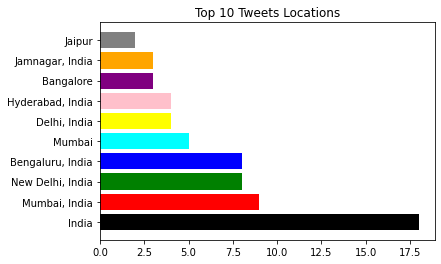

In [323]:
# bar chart for top 10 locations of tweets
names_geo = list(high_geo_dict.keys())
values_geo = list(high_geo_dict.values())

plt.barh(range(len(high_geo_dict)), values_geo, tick_label=names_geo, color=['black', 'red', 'green', 'blue', 'cyan', 'yellow', 'pink' , 'purple', 'orange', 'grey'])
plt.title('Top 10 Tweets Locations')
plt.show()

In [154]:
# convert list of type of fraud to dictionary with frequency without repetition
freq_keyword = {} 
for item in df_tweets_translated.Keyword: 
    if (item in freq_keyword): \
        freq_keyword[item] += 1
    else: 
        freq_keyword[item] = 1

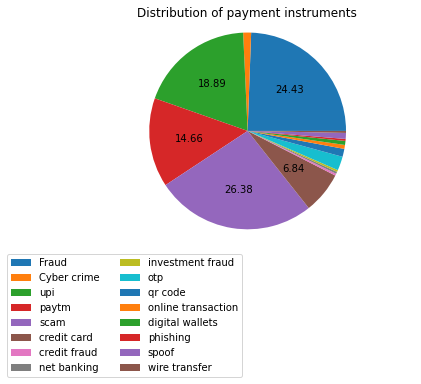

In [328]:
# Data to plot
labels_type = []
sizes_type = []

for x, y in freq_keyword.items():
    labels_type.append(x)
    sizes_type.append(y)

# Plot
plt.pie(sizes_type, autopct=lambda p: format(p,'.2f') if p >5  else None)
plt.title('Distribution of payment instruments')
plt.legend(labels=labels_type, loc='upper right', bbox_to_anchor=(0.5, -0.04), ncol=2)
plt.axis('equal')
plt.show()

In [258]:
# making a copy of
freq_cloud=freq.copy()

In [250]:
# reads the entity cleaner file and converts into a list
df_entity_cleaner = pd.read_csv ('entity_cleaner.csv')
entity_cleaner_list=df_entity_cleaner.Remove.tolist()

In [253]:
# cleaning entities based on list
dels = []
for k, v in freq_cloud.items():
    if k in entity_cleaner_list:
        dels.append(k)

for i in dels:
    del freq_cloud[i]

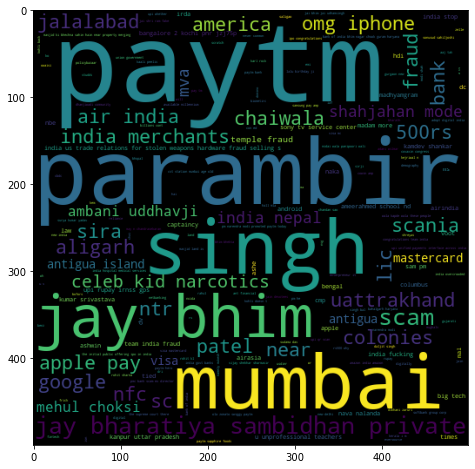

In [340]:
wordcloud = WordCloud(width = 500, height = 500).generate_from_frequencies(freq_cloud)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)

In [281]:
# Emotions pie chart
emotion_list_graph=[]
emotion_list_graph=df_tweets_translated.Emotion.copy()
emotion_string_graph= emotion_list_graph.to_string()
emotion_string_graph=re.sub(r'[^a-zA-Z]', ' ', emotion_string_graph)
emotion_string_graph=re.sub(' +', ' ', emotion_string_graph)
emotions_tokens = nltk.word_tokenize(emotion_string_graph)

In [287]:
# convert list of entitites to dictionary with frequency without repetition
freq_emotion= {} 
for item in emotions_tokens: 
    if (item in freq_emotion): \
        freq_emotion[item] += 1
    else: 
        freq_emotion[item] = 1

In [6]:
(freq_emotion)

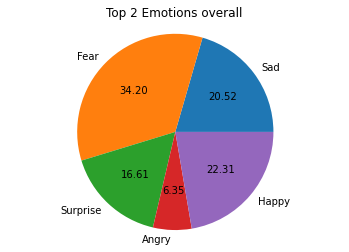

In [297]:
# Data to plot
labels_emo = []
sizes_emo = []

for x, y in freq_emotion.items():
    labels_emo.append(x)
    sizes_emo.append(y)

# Plot
plt.pie(sizes_emo,labels= labels_emo,autopct=lambda p: format(p,'.2f') if p >5  else None)
plt.title('Top 2 Emotions overall')
plt.axis('equal')
plt.show()

In [298]:
import streamlit as st

In [314]:
# Title and markdown for dashboard mentioned here
st.title("DigitalPayment Fraud Detection using Social Media")

st.markdown("The dashboard will help RBI to monitor social media for fraud detection using various analysis techniques.")

# details for sidebar dashboard
st.sidebar.title("Select Analysis tool")

st.sidebar.markdown("Select the Charts/Plots accordingly:")

# sidebar selection opetions dashboard
chart_visual = st.sidebar.selectbox('Select Analysis', ('EDA', 'Type of Fraud and/or Payment Instrument Involved', 'Sentiment Analysis', 'Emotion Classification', 'Entity Detection','Data View', 'Historic Emotion'))

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

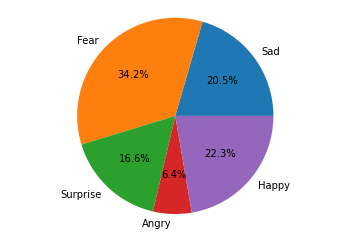

In [326]:
# Emotion pie chart for dashboard stored in fig1
fig1, ax1 = plt.subplots()
ax1.pie(sizes_emo, labels=labels_emo, autopct='%1.1f%%')
ax1.axis('equal')
st.pyplot(fig1)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

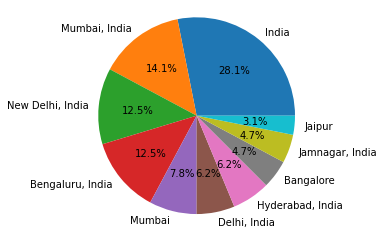

In [325]:
# Geohraphic location pie chart for dashboard stored in fig2
fig2, ax2 = plt.subplots()
ax2.pie(values_geo, labels=names_geo, autopct='%1.1f%%')
ax2.axis('equal')
st.pyplot(fig2)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

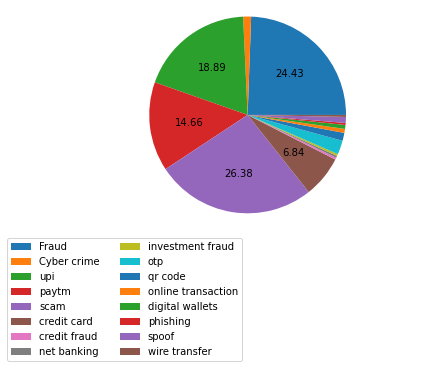

In [335]:
# Type of fraud/ payment instrument pie chart for dashboard stored in fig3
fig3, ax3 = plt.subplots()
ax3.pie(sizes_type, autopct=lambda p: format(p,'.2f') if p >2.5 else None)
ax3.legend(labels=labels_type, loc='upper right', bbox_to_anchor=(0.5, -0.04), ncol=2)
ax3.axis('equal')
st.pyplot(fig3)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

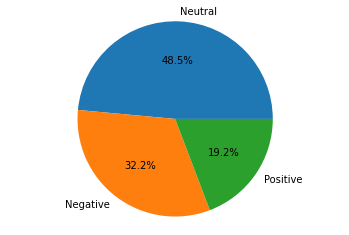

In [337]:
# Sentiment Analysis pie chart for dashboard stored in fig4
fig4, ax4 = plt.subplots()
ax4.pie(vader_counts.values, labels=vader_counts.index, autopct='%1.1f%%')
ax4.axis('equal')
st.pyplot(fig4)

In [344]:
if chart_visual == 'Emotion Classification':
    st.text("The top 2 emotions associated with digital payments. Gives a broad overview of the country's emotions associated with the same")
    st.text(freq_emotion)
    st.plotly_chart(fig1, use_container_width=True)

elif chart_visual == 'EDA':
    st.markdown('The total number of tweets analysed in this run= ')
    st.text(total_tweet_count)
    st.plotly_chart(fig2, use_container_width=True)
    
    
elif chart_visual == 'Type of Fraud and/or Payment Instrument Involved':
    st.text("Distribution of Fraud types or the payment instrument involved")
    st.plotly_chart(fig3, use_container_width=True)
    
elif chart_visual == 'Sentiment Analysis':
    st.text("The sentiments associated with digital payments. Gives an overview of the country's sentiment associated with the same")
    st.text(vader_counts)
    st.plotly_chart(fig4, use_container_width=True)

elif chart_visual == 'Entity Detection':
    wordcloud = WordCloud(width = 500, height = 500).generate_from_frequencies(freq_cloud)
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    st.pyplot()

elif chart_visual == 'Data View':
    st.dataframe(df_tweets_translated)
    
#elif chart_visual == 'Historic Emotion':   
  

#st.plotly_chart(fig, use_container_width=True)

Link1: https://www.geeksforgeeks.org/create-interactive-dashboard-in-python-using-streamlit/
Link2: https://www.analyticsvidhya.com/blog/2020/10/create-interactive-dashboards-with-streamlit-and-python/
Link3 : https://towardsdatascience.com/a-multi-page-interactive-dashboard-with-streamlit-and-plotly-c3182443871a